In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(type(x_train), x_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


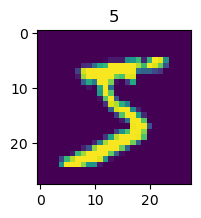

In [9]:
#visulise the data
img1 = x_train[0]

%matplotlib inline
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(2,2))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [10]:
img1.shape

(28, 28)

In [14]:
#format the input data
feature_size = img1.shape[0] * img1.shape[1]

#reshape 3D to 2D
x_train_format = x_train.reshape(x_train.shape[0], feature_size)
x_test_format = x_test.reshape(x_test.shape[0], feature_size)
print(x_train_format.shape)
print(x_train.shape)

(60000, 784)
(60000, 28, 28)


In [21]:
#normalize data
x_train_normal = x_train_format/255
x_test_normal = x_test_format/255

print(x_train_normal[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [23]:
#format the output
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)

print(y_train)
print(y_train_format)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [27]:
#setup the model
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=392, activation='sigmoid', input_dim=feature_size))
mlp.add(Dense(units=392, activation='sigmoid',))
mlp.add(Dense(units=10, activation='softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 392)               154056    
                                                                 
 dense_2 (Dense)             (None, 10)                3930      
                                                                 
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [29]:
#configure the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam')


In [30]:
mlp.fit(x_train_normal, y_train_format, epochs=10)

Epoch 1/10
   1/1875 [..............................] - ETA: 5:47 - loss: 2.4140

2023-04-29 16:49:59.255030: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 5s 3ms/step - loss: 0.3407
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1436
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0921
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0470
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0358
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0197
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0176
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0130


In [35]:
#evaluate the model
import numpy as np
y_train_predict = np.argmax(mlp.predict(x_train_normal),axis=1)
print(y_train_predict)

1875/1875 [==============================] - 1s 573us/step
[5 0 4 ... 5 6 8]


In [37]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

0.9957333333333334


In [39]:
y_test_prect = np.argmax(mlp.predict(x_test_normal), axis=1)
accuracy_test = accuracy_score(y_test, y_test_prect)
print(accuracy_test)

313/313 [==============================] - 0s 667us/step
0.9789


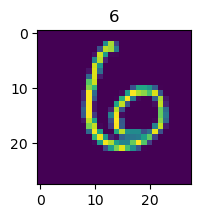

In [43]:
fig2 = plt.figure(figsize=(2,2))
t_idx = 100
img2 = x_test[t_idx]
plt.imshow(img2)
plt.title(y_test_prect[t_idx])
plt.show()
